In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns
import scipy.stats as s
import pyodbc

In [2]:
df = pd.read_csv('modele.csv', dtype={'NewUserId': str})
df.drop(['Unnamed: 0'],axis='columns', inplace=True)
pd.set_option('display.max_columns', None)
df

NewUserId  WasAddedToCart  WasAddedToCart_sum  \
0         629835214461368392               0                   0   
1                    6156947               0                   0   
2        6298370606872454516               0                   0   
3        6298374081547046372               0                   0   
4                   23438869               0                   0   
...                      ...             ...                 ...   
1455988             14563067               1                  18   
1455989    99505086684061834               0                   0   
1455990   995051316028061795               0                   0   
1455991   995067112917890439               0                   0   
1455992    99506800360300550               0                   0   

         WasAddedToCart_mean  WasBought  WasBought_sum  WasBought_mean  \
0                          0          0              0               0   
1                          0          0              0               0   
2                          0          0              0               0   
3                          0          0              0               0   
4                          0          0              0               0   
...                      ...        ...            ...             ...   
1455988                    0          0              0               0   
1455989                    0          0              0               0   
1455990                    0          0              0               0   
1455991                    0          0              0               0   
1455992                    0          0              0               0   

         OpenSizeTab  RegisterFlag  SaleStatus  Child  S  M  L  LIP  MIP  HIP  \
0                  0             0           1      0  0  0  0    1    1    1   
1                  0             1           1      0  0  0  0    0    1    0   
2                  0             0           1      0  0  0  0    1    1    0   
3                  0             0           1      0  0  0  0    0    0    1   
4                  0             1           1      0  0  0  0    1    1    1   
...              ...           ...         ...    ... .. .. ..  ...  ...  ...   
1455988            0             1           1      1  0  1  1    1    1    1   
1455989            0             0           1      0  0  0  0    1    0    0   
1455990            0             0           1      0  0  0  0    0    1    0   
1455991            0             0           0      0  0  0  0    0    1    0   
1455992            0             0           0      0  0  0  0    0    1    1   

         AvgTimeOnPage_sum  AvgTimeOnPage_mean  AvgTimeOnPage_klikacz  \
0                      223                  15                      0   
1                        3                   3                      1   
2                       60                   8                      1   
3                       31                  31                      0   
4                      114                  11                      1   
...                    ...                 ...                    ...   
1455988               1100                  22                      1   
1455989                  0                   0                      1   
1455990                  1                   1                      1   
1455991                 17                   8                      0   
1455992                219                  54                      1   

         AvgTimeOnPage_mysliciel  AvgTimeOnPage_przecietny  \
0                              0                         1   
1                              0                         0   
2                              0                         1   
3                              0                         0   
4                              0                         1   
...                          ...                       ...   
1455988                      

In [3]:
kopia = df[['AvgTimeOnPage_sum','AvgTimeOnPage_mean']]

In [4]:
#normalizacja
zmienne_ciagle=['AvgTimeOnPage_sum','AvgTimeOnPage_mean','ViewsCount_sum','ViewsCount_mean','AccordionExpand_sum','AccordionExpand_mean','ChangeImage_sum','ChangeImage_mean']
df[zmienne_ciagle] = (df[zmienne_ciagle] - df[zmienne_ciagle].min())/(df[zmienne_ciagle].max() - df[zmienne_ciagle].min())

In [5]:
df

NewUserId  WasAddedToCart  WasAddedToCart_sum  \
0         629835214461368392               0                   0   
1                    6156947               0                   0   
2        6298370606872454516               0                   0   
3        6298374081547046372               0                   0   
4                   23438869               0                   0   
...                      ...             ...                 ...   
1455988             14563067               1                  18   
1455989    99505086684061834               0                   0   
1455990   995051316028061795               0                   0   
1455991   995067112917890439               0                   0   
1455992    99506800360300550               0                   0   

         WasAddedToCart_mean  WasBought  WasBought_sum  WasBought_mean  \
0                          0          0              0               0   
1                          0          0              0               0   
2                          0          0              0               0   
3                          0          0              0               0   
4                          0          0              0               0   
...                      ...        ...            ...             ...   
1455988                    0          0              0               0   
1455989                    0          0              0               0   
1455990                    0          0              0               0   
1455991                    0          0              0               0   
1455992                    0          0              0               0   

         OpenSizeTab  RegisterFlag  SaleStatus  Child  S  M  L  LIP  MIP  HIP  \
0                  0             0           1      0  0  0  0    1    1    1   
1                  0             1           1      0  0  0  0    0    1    0   
2                  0             0           1      0  0  0  0    1    1    0   
3                  0             0           1      0  0  0  0    0    0    1   
4                  0             1           1      0  0  0  0    1    1    1   
...              ...           ...         ...    ... .. .. ..  ...  ...  ...   
1455988            0             1           1      1  0  1  1    1    1    1   
1455989            0             0           1      0  0  0  0    1    0    0   
1455990            0             0           1      0  0  0  0    0    1    0   
1455991            0             0           0      0  0  0  0    0    1    0   
1455992            0             0           0      0  0  0  0    0    1    1   

         AvgTimeOnPage_sum  AvgTimeOnPage_mean  AvgTimeOnPage_klikacz  \
0                 0.009807            0.025000                      0   
1                 0.000132            0.005000                      1   
2                 0.002639            0.013333                      1   
3                 0.001363            0.051667                      0   
4                 0.005014            0.018333                      1   
...                    ...                 ...                    ...   
1455988           0.048377            0.036667                      1   
1455989           0.000000            0.000000                      1   
1455990           0.000044            0.001667                      1   
1455991           0.000748            0.013333                      0   
1455992           0.009631            0.090000                      1   

         AvgTimeOnPage_mysliciel  AvgTimeOnPage_przecietny  \
0                              0                         1   
1                              0                         0   
2                              0                         1   
3                              0                         0   
4                              0                         1   
...                          ...                       ...   
1455988                      

# pca

In [6]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['Color_bialy',
       'Color_brazowy', 'Color_czarny', 'Color_czerwony', 'Color_fioletowy',
       'Color_inne', 'Color_niebieski', 'Color_pastelowy', 'Color_pomarancz',
       'Color_rozowy', 'Color_szary', 'Color_zielony', 'Color_zolty']])
kolorki = pd.DataFrame(data = pcaComp,columns=['kolor'])
kolorki


kolor
0        1.292445
1       -0.537062
2        0.221665
3       -0.500102
4        0.884607
...           ...
1455988  1.608749
1455989 -0.537062
1455990 -0.500102
1455991 -0.358743
1455992  0.139449

[1455993 rows x 1 columns]

In [7]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['S', 'M', 'L']])
rozmiary = pd.DataFrame(data = pcaComp,columns=['rozmiar'])
rozmiary

rozmiar
0       -0.191975
1       -0.191975
2       -0.191975
3       -0.191975
4       -0.191975
...           ...
1455988  0.886897
1455989 -0.191975
1455990 -0.191975
1455991 -0.191975
1455992 -0.191975

[1455993 rows x 1 columns]

In [8]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['LIP', 'MIP', 'HIP']])
kategoria_cenowa = pd.DataFrame(data = pcaComp,columns=['kategoria_cenowa'])
kategoria_cenowa

kategoria_cenowa
0                0.470238
1               -0.743734
2               -0.047308
3                0.270942
4                0.470238
...                   ...
1455988          0.470238
1455989          0.449821
1455990         -0.743734
1455991         -0.743734
1455992         -0.226188

[1455993 rows x 1 columns]

In [9]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['FashionLevelSimple_basic', 'FashionLevelSimple_best',
       'FashionLevelSimple_brak', 'FashionLevelSimple_core',
       'FashionLevelSimple_direct', 'FashionLevelSimple_inne']])
fashion_level = pd.DataFrame(data = pcaComp,columns=['fashion_level'])
fashion_level

fashion_level
0             0.631732
1             0.313306
2            -0.031644
3             0.336712
4            -0.008239
...                ...
1455988       0.804865
1455989      -0.671615
1455990      -0.153532
1455991      -0.008239
1455992      -0.008239

[1455993 rows x 1 columns]

In [10]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['AvgTimeOnPage_klikacz', 'AvgTimeOnPage_mysliciel',
       'AvgTimeOnPage_przecietny', 'AvgTimeOnPage_zainteresowany']])
czas_na_stronie = pd.DataFrame(data = pcaComp,columns=['czas_na_stronie'])
czas_na_stronie

czas_na_stronie
0               0.758377
1              -0.886469
2              -0.335168
3               0.207076
4              -0.335168
...                  ...
1455988         0.306057
1455989        -0.886469
1455990        -0.886469
1455991         0.355429
1455992        -0.245244

[1455993 rows x 1 columns]

In [11]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['DepartmentName_accessories', 'DepartmentName_kids',
       'DepartmentName_ladies', 'DepartmentName_men']])
departament = pd.DataFrame(data = pcaComp,columns=['departament'])
departament

departament
0          -0.240815
1          -0.355862
2          -0.355862
3           1.038601
4          -0.355862
...              ...
1455988     0.311874
1455989    -0.355862
1455990    -0.355862
1455991    -0.355862
1455992     0.311874

[1455993 rows x 1 columns]

In [12]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[[ 'Season_AW',
       'Season_SS']])
sezon = pd.DataFrame(data = pcaComp,columns=['sezon'])
sezon

sezon
0        0.075309
1       -0.663161
2        0.075309
3       -0.663161
4        0.075309
...           ...
1455988  0.075309
1455989 -0.663161
1455990 -0.663161
1455991  0.749595
1455992  0.749595

[1455993 rows x 1 columns]

In [13]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['ViewsCount_klikacz', 'ViewsCount_mysliciel', 'ViewsCount_przecietny',
       'AccordionExpand_klikacz', 'AccordionExpand_nieklikacz',
'ChangeImage_mysliciel', 'ChangeImage_nieklikacz',
       'ChangeImage_przecietny','OpenSizeTab']])
zainteresowanie_produktem = pd.DataFrame(data = pcaComp,columns=['zainteresowanie_produktem'])
zainteresowanie_produktem

zainteresowanie_produktem
0                        -0.109265
1                        -0.570169
2                         0.893876
3                        -0.694243
4                         0.893876
...                            ...
1455988                   0.893876
1455989                  -0.694243
1455990                  -0.570169
1455991                  -0.570169
1455992                  -0.233339

[1455993 rows x 1 columns]

In [14]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['ViewsCount_sum', 'AccordionExpand_sum',
       'ChangeImage_sum','OpenSizeTab']])
zainteresowanie_produktem_sum = pd.DataFrame(data = pcaComp,columns=['zainteresowanie_produktem_sum'])
zainteresowanie_produktem_sum

zainteresowanie_produktem_sum
0                            -0.043614
1                            -0.043927
2                            -0.043844
3                            -0.043936
4                            -0.043694
...                                ...
1455988                      -0.043024
1455989                      -0.043936
1455990                      -0.043922
1455991                      -0.043909
1455992                      -0.043882

[1455993 rows x 1 columns]

In [15]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['ViewsCount_mean', 'AccordionExpand_mean',
       'ChangeImage_mean','OpenSizeTab']])
zainteresowanie_produktem_mean = pd.DataFrame(data = pcaComp,columns=['zainteresowanie_produktem_mean'])
zainteresowanie_produktem_mean

zainteresowanie_produktem_mean
0                             -0.043459
1                             -0.043963
2                             -0.044214
3                             -0.044466
4                             -0.043711
...                                 ...
1455988                       -0.043963
1455989                       -0.044466
1455990                       -0.043711
1455991                       -0.043963
1455992                       -0.043963

[1455993 rows x 1 columns]

In [16]:
pca = sklearn.decomposition.PCA(n_components=1)
pcaComp=pca.fit_transform(df[['WasAddedToCart', 'WasBought']])
zakup = pd.DataFrame(data = pcaComp,columns=['zakup'])
zakup

zakup
0       -0.227519
1       -0.227519
2       -0.227519
3       -0.227519
4       -0.227519
...           ...
1455988  0.738072
1455989 -0.227519
1455990 -0.227519
1455991 -0.227519
1455992 -0.227519

[1455993 rows x 1 columns]

In [17]:
df2 = pd.concat([df[['Child']], df[['SaleStatus']],df[['RegisterFlag']],kolorki,rozmiary,kategoria_cenowa,fashion_level,czas_na_stronie,departament,sezon,zainteresowanie_produktem,zainteresowanie_produktem_sum,zainteresowanie_produktem_mean,zakup,kopia], axis=1)
df2=df2.round(6)
df2

Child  SaleStatus  RegisterFlag     kolor   rozmiar  \
0            0           1             0  1.292445 -0.191975   
1            0           1             1 -0.537062 -0.191975   
2            0           1             0  0.221665 -0.191975   
3            0           1             0 -0.500102 -0.191975   
4            0           1             1  0.884607 -0.191975   
...        ...         ...           ...       ...       ...   
1455988      1           1             1  1.608749  0.886897   
1455989      0           1             0 -0.537062 -0.191975   
1455990      0           1             0 -0.500102 -0.191975   
1455991      0           0             0 -0.358743 -0.191975   
1455992      0           0             0  0.139449 -0.191975   

         kategoria_cenowa  fashion_level  czas_na_stronie  departament  \
0                0.470238       0.631732         0.758377    -0.240815   
1               -0.743734       0.313306        -0.886469    -0.355862   
2               -0.047308      -0.031644        -0.335168    -0.355862   
3                0.270942       0.336712         0.207076     1.038601   
4                0.470238      -0.008239        -0.335168    -0.355862   
...                   ...            ...              ...          ...   
1455988          0.470238       0.804865         0.306057     0.311874   
1455989          0.449821      -0.671615        -0.886469    -0.355862   
1455990         -0.743734      -0.153532        -0.886469    -0.355862   
1455991         -0.743734      -0.008239         0.355429    -0.355862   
1455992         -0.226188      -0.008239        -0.245244     0.311874   

            sezon  zainteresowanie_produktem  zainteresowanie_produktem_sum  \
0        0.075309                  -0.109265                      -0.043614   
1       -0.663161                  -0.570169                      -0.043927   
2        0.075309                   0.893876                      -0.043844   
3       -0.663161                  -0.694243                      -0.043936   
4        0.075309                   0.893876                      -0.043694   
...           ...                        ...                            ...   
1455988  0.075309                   0.893876                      -0.043024   
1455989 -0.663161                  -0.694243                      -0.043936   
1455990 -0.663161                  -0.570169                      -0.043922   
1455991  0.749595                  -0.570169                      -0.043909   
1455992  0.749595                  -0.233339                      -0.043882   

         zainteresowanie_produktem_mean     zakup  AvgTimeOnPage_sum  \
0                             -0.043459 -0.227519                223   
1                             -0.043963 -0.227519                  3   
2                             -0.044214 -0.227519                 60   
3                             -0.044466 -0.227519                 31   
4                             -0.043711 -0.227519                114   
...                                 ...       ...                ...   
1455988                       -0.043963  0.738072               1100   
1455989                       -0.044466 -0.227519                  0   
1455990                       -0.043711 -0.227519                  1   
1455991                       -0.043963 -0.227519                 17   
1455992                       -0.043963 -0.227519                219   

         AvgTimeOnPage_mean  
0                        15  
1                         3  
2                         8  
3                        31  
4                        11  
...                     ...  
1455988                  22  
1455989                   0  
1455990                   1  
1455991                   8  
1455992                  54  

[1455993 rows x 16 columns]

In [100]:
korelacja_P = df2.corr('pearson')
korelacja_P
korelacja_P_tr = korelacja_P.where(np.triu(np.ones(korelacja_P.shape,
dtype=np.bool), k=1)).stack().sort_values()
korelacja_P_tr

korelacja_P_tr[abs(korelacja_P_tr)>0.75]

SaleStatus                     sezon                            -0.815530
kolor                          zainteresowanie_produktem         0.754753
zainteresowanie_produktem_sum  zainteresowanie_produktem_mean    0.999994
dtype: float64

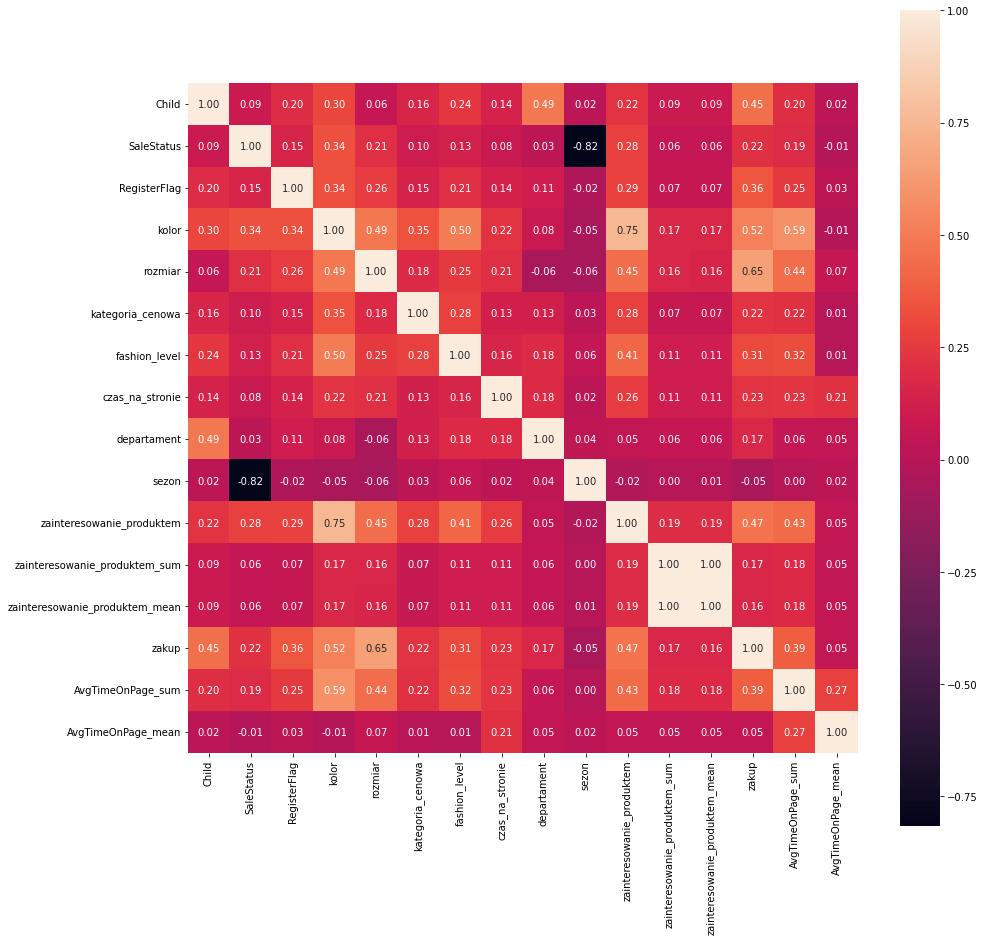

In [101]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(df2.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
kolor_PCA = df2[['kolor']]
kolor_PCA = pd.concat([kolor_PCA,df[['Color_bialy',
       'Color_brazowy', 'Color_czarny', 'Color_czerwony', 'Color_fioletowy',
       'Color_inne', 'Color_niebieski', 'Color_pastelowy', 'Color_pomarancz',
       'Color_rozowy', 'Color_szary', 'Color_zielony', 'Color_zolty']]], axis=1)
kolor_PCA.columns = kolor_PCA.columns.str.replace("Color_", "")
kolor_PCA=pd.concat([kolor_PCA.loc[:, 'kolor'],kolor_PCA.loc[:, 'bialy':'zolty'].replace(1, pd.Series(kolor_PCA.columns, kolor_PCA.columns))],axis=1)
kolor_PCA=pd.concat([kolor_PCA.loc[:, 'kolor'],kolor_PCA.loc[:, 'bialy':'zolty'].replace(0, np.nan)],axis=1)
kolor_PCA['kolory'] = kolor_PCA[kolor_PCA.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
kolor_PCA.drop(['bialy','brazowy','czarny','czerwony','fioletowy','inne','niebieski','pastelowy','pomarancz','rozowy','szary','zielony','zolty'],axis='columns',inplace=True)
kolor_PCA

In [ ]:
kolor_PCA.drop_duplicates(inplace=True)
kolor_PCA

In [ ]:
rozmiar_PCA = df2[['rozmiar']]
rozmiar_PCA = pd.concat([rozmiar_PCA,df[['S', 'M', 'L']]], axis=1)
rozmiar_PCA=pd.concat([rozmiar_PCA.loc[:, 'rozmiar'],rozmiar_PCA.loc[:, 'S':'L'].replace(1, pd.Series(rozmiar_PCA.columns, rozmiar_PCA.columns))],axis=1)
rozmiar_PCA=pd.concat([rozmiar_PCA.loc[:, 'rozmiar'],rozmiar_PCA.loc[:, 'S':'L'].replace(0, np.nan)],axis=1)
rozmiar_PCA['rozmiary'] = rozmiar_PCA[rozmiar_PCA.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
rozmiar_PCA.drop(['S','M','L'],axis='columns',inplace=True)


In [ ]:
rozmiar_PCA.drop_duplicates(inplace=True)
rozmiar_PCA

In [ ]:
kategoria_cenowa_PCA = df2[['kategoria_cenowa']]
kategoria_cenowa_PCA = pd.concat([kategoria_cenowa_PCA,df[['LIP', 'MIP', 'HIP']]], axis=1)
kategoria_cenowa_PCA=pd.concat([kategoria_cenowa_PCA.loc[:, 'kategoria_cenowa'],kategoria_cenowa_PCA.loc[:, 'LIP':'HIP'].replace(1, pd.Series(kategoria_cenowa_PCA.columns, kategoria_cenowa_PCA.columns))],axis=1)
kategoria_cenowa_PCA=pd.concat([kategoria_cenowa_PCA.loc[:, 'kategoria_cenowa'],kategoria_cenowa_PCA.loc[:, 'LIP':'HIP'].replace(0, np.nan)],axis=1)
kategoria_cenowa_PCA['kategorie_cenowe'] = kategoria_cenowa_PCA[kategoria_cenowa_PCA.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
kategoria_cenowa_PCA.drop(['LIP','HIP','MIP'],axis='columns',inplace=True)

In [ ]:
kategoria_cenowa_PCA.drop_duplicates(inplace=True)
kategoria_cenowa_PCA

In [ ]:
fashion_level_PCA = df2[['fashion_level']]
fashion_level_PCA = pd.concat([fashion_level_PCA,df[['FashionLevelSimple_basic', 'FashionLevelSimple_best',
       'FashionLevelSimple_brak', 'FashionLevelSimple_core',
       'FashionLevelSimple_direct', 'FashionLevelSimple_inne']]], axis=1)
fashion_level_PCA.columns = fashion_level_PCA.columns.str.replace("FashionLevelSimple_", "")
fashion_level_PCA=pd.concat([fashion_level_PCA.loc[:, 'fashion_level'],fashion_level_PCA.loc[:, 'basic':'inne'].replace(1, pd.Series(fashion_level_PCA.columns, fashion_level_PCA.columns))],axis=1)
fashion_level_PCA=pd.concat([fashion_level_PCA.loc[:, 'fashion_level'],fashion_level_PCA.loc[:, 'basic':'inne'].replace(0, np.nan)],axis=1)
fashion_level_PCA['fashion_levele'] = fashion_level_PCA[fashion_level_PCA.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
fashion_level_PCA.drop(['basic','best','brak','core','direct','inne'],axis='columns',inplace=True)
fashion_level_PCA

In [ ]:
fashion_level_PCA.drop_duplicates(inplace=True)
fashion_level_PCA

In [ ]:
czas_PCA = df2[['czas_na_stronie']]
czas_PCA = pd.concat([czas_PCA,df[['AvgTimeOnPage_klikacz', 'AvgTimeOnPage_mysliciel',
       'AvgTimeOnPage_przecietny', 'AvgTimeOnPage_zainteresowany']]], axis=1)
czas_PCA.columns = czas_PCA.columns.str.replace("AvgTimeOnPage_", "")
czas_PCA=pd.concat([czas_PCA.loc[:, 'czas_na_stronie'],czas_PCA.loc[:, 'klikacz':'zainteresowany'].replace(1, pd.Series(czas_PCA.columns, czas_PCA.columns))],axis=1)
czas_PCA=pd.concat([czas_PCA.loc[:, 'czas_na_stronie'],czas_PCA.loc[:, 'klikacz':'zainteresowany'].replace(0, np.nan)],axis=1)
czas_PCA['czasy'] = czas_PCA[czas_PCA.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
czas_PCA.drop(['klikacz','mysliciel','przecietny','zainteresowany'],axis='columns',inplace=True)


In [ ]:
czas_PCA.drop_duplicates(inplace=True)
czas_PCA

In [ ]:
department_PCA = df2[['departament']]
department_PCA = pd.concat([department_PCA,df[['DepartmentName_accessories', 'DepartmentName_kids',
       'DepartmentName_ladies', 'DepartmentName_men']]], axis=1)
department_PCA.columns = department_PCA.columns.str.replace("DepartmentName_", "")
department_PCA=pd.concat([department_PCA.loc[:, 'departament'],department_PCA.loc[:, 'accessories':'men'].replace(1, pd.Series(department_PCA.columns, department_PCA.columns))],axis=1)
department_PCA=pd.concat([department_PCA.loc[:, 'departament'],department_PCA.loc[:, 'accessories':'men'].replace(0, np.nan)],axis=1)
department_PCA['departamenty'] = department_PCA[department_PCA.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
department_PCA.drop(['accessories','kids','ladies','men'],axis='columns',inplace=True)

In [ ]:
department_PCA.drop_duplicates(inplace=True)
department_PCA

In [ ]:
sezon_PCA = df2[['sezon']]
sezon_PCA = pd.concat([sezon_PCA,df[['Season_AW',
       'Season_SS']]], axis=1)
sezon_PCA.columns = sezon_PCA.columns.str.replace("Season_", "")
sezon_PCA=pd.concat([sezon_PCA.loc[:, 'sezon'],sezon_PCA.loc[:, 'AW':'SS'].replace(1, pd.Series(sezon_PCA.columns, sezon_PCA.columns))],axis=1)
sezon_PCA=pd.concat([sezon_PCA.loc[:, 'sezon'],sezon_PCA.loc[:, 'AW':'SS'].replace(0, np.nan)],axis=1)
sezon_PCA['sezony'] = sezon_PCA[sezon_PCA.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
sezon_PCA.drop(['AW','SS'],axis='columns',inplace=True)

In [ ]:
sezon_PCA.drop_duplicates(inplace=True)
sezon_PCA

In [ ]:
zainteresowanie_PCA = df2[['zainteresowanie_produktem']]
zainteresowanie_PCA = pd.concat([zainteresowanie_PCA,df[['ViewsCount_klikacz', 'ViewsCount_mysliciel', 'ViewsCount_przecietny',
       'AccordionExpand_klikacz', 'AccordionExpand_nieklikacz',
'ChangeImage_mysliciel', 'ChangeImage_nieklikacz',
       'ChangeImage_przecietny','OpenSizeTab']]], axis=1)
zainteresowanie_PCA=pd.concat([zainteresowanie_PCA.loc[:, 'zainteresowanie_produktem'],zainteresowanie_PCA.loc[:, 'ViewsCount_klikacz':'OpenSizeTab'].replace(1, pd.Series(zainteresowanie_PCA.columns, zainteresowanie_PCA.columns))],axis=1)
zainteresowanie_PCA=pd.concat([zainteresowanie_PCA.loc[:, 'zainteresowanie_produktem'],zainteresowanie_PCA.loc[:, 'ViewsCount_klikacz':'OpenSizeTab'].replace(0, np.nan)],axis=1)
zainteresowanie_PCA['zainteresowania'] = zainteresowanie_PCA[zainteresowanie_PCA.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
zainteresowanie_PCA.drop(['ViewsCount_klikacz', 'ViewsCount_mysliciel', 'ViewsCount_przecietny',
       'AccordionExpand_klikacz', 'AccordionExpand_nieklikacz',
'ChangeImage_mysliciel', 'ChangeImage_nieklikacz',
       'ChangeImage_przecietny','OpenSizeTab'],axis='columns',inplace=True)

In [ ]:
zainteresowanie_PCA.drop_duplicates(inplace=True)
zainteresowanie_PCA

In [ ]:
zakup_PCA = df2[['zakup']]
zakup_PCA = pd.concat([zakup_PCA,df[['WasAddedToCart', 'WasBought']]], axis=1)
zakup_PCA=pd.concat([zakup_PCA.loc[:, 'zakup'],zakup_PCA.loc[:, 'WasAddedToCart':'WasBought'].replace(1, pd.Series(zakup_PCA.columns, zakup_PCA.columns))],axis=1)
zakup_PCA=pd.concat([zakup_PCA.loc[:, 'zakup'],zakup_PCA.loc[:, 'WasAddedToCart':'WasBought'].replace(0, np.nan)],axis=1)
zakup_PCA['zakupy'] = zakup_PCA[zakup_PCA.columns[1:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
zakup_PCA.drop(['WasAddedToCart', 'WasBought'],axis='columns',inplace=True)

In [ ]:
zakup_PCA.drop_duplicates(inplace=True)
zakup_PCA

In [ ]:
# zainteresowanie_PCA_sum = df2[['zainteresowanie_produktem_sum']]
# zainteresowanie_PCA_sum = pd.concat([zainteresowanie_PCA_sum,df[['ViewsCount_sum',
#        'AccordionExpand_sum','ChangeImage_sum']]], axis=1)
# zainteresowanie_PCA_sum=pd.concat([zainteresowanie_PCA_sum.loc[:, 'zainteresowanie_produktem_sum'],zainteresowanie_PCA_sum.loc[:, 'ViewsCount_sum':'ChangeImage_sum'].replace(1, pd.Series(zainteresowanie_PCA_sum.columns, zainteresowanie_PCA_sum.columns))],axis=1)
# zainteresowanie_PCA_sum=pd.concat([zainteresowanie_PCA_sum.loc[:, 'zainteresowanie_produktem_sum'],zainteresowanie_PCA_sum.loc[:, 'ViewsCount_sum':'ChangeImage_sum'].replace(0, np.nan)],axis=1)
# zainteresowanie_PCA_sum['zainteresowania_sum'] = zainteresowanie_PCA_sum[zainteresowanie_PCA_sum.columns[1:]].apply(
#     lambda x: ','.join(x.dropna().astype(str)),
#     axis=1
# )
# zainteresowanie_PCA.drop(['ViewsCount_sum',
#        'AccordionExpand_sum','ChangeImage_sum'],axis='columns',inplace=True)

In [ ]:
# zainteresowanie_PCA_sum.drop_duplicates(inplace=True)
# zainteresowanie_PCA_sum

In [ ]:
# zainteresowanie_PCA_mean = df2[['zainteresowanie_produktem_mean']]
# zainteresowanie_PCA_mean = pd.concat([zainteresowanie_PCA_mean,df[['ViewsCount_mean',
#        'AccordionExpand_mean','ChangeImage_mean']]], axis=1)
# zainteresowanie_PCA_mean=pd.concat([zainteresowanie_PCA_mean.loc[:, 'zainteresowanie_produktem_mean'],zainteresowanie_PCA_mean.loc[:, 'ViewsCount_mean':'ChangeImage_mean'].replace(1, pd.Series(zainteresowanie_PCA_mean.columns, zainteresowanie_PCA_mean.columns))],axis=1)
# zainteresowanie_PCA_mean=pd.concat([zainteresowanie_PCA_mean.loc[:, 'zainteresowanie_produktem_mean'],zainteresowanie_PCA_mean.loc[:, 'ViewsCount_mean':'ChangeImage_mean'].replace(0, np.nan)],axis=1)
# zainteresowanie_PCA_mean['zainteresowania_mean'] = zainteresowanie_PCA_mean[zainteresowanie_PCA_mean.columns[1:]].apply(
#     lambda x: ','.join(x.dropna().astype(str)),
#     axis=1
# )
# zainteresowanie_PCA.drop(['ViewsCount_mean',
#        'AccordionExpand_mean','ChangeImage_mean'],axis='columns',inplace=True)

In [ ]:
# zainteresowanie_PCA_mean.drop_duplicates(inplace=True)
# zainteresowanie_PCA_mean

In [ ]:
#sns.pairplot(df2)

# MODELE!

## kolor, rozmiar, zakup

In [21]:
from sklearn.cluster import KMeans
#import plotly.graph_objs as go


In [19]:
df_zakup_kolor_rozmiar = df2[['zakup','rozmiar','kolor']]
df_zakup_kolor_rozmiar

zakup   rozmiar     kolor
0       -0.227519 -0.191975  1.292445
1       -0.227519 -0.191975 -0.537062
2       -0.227519 -0.191975  0.221665
3       -0.227519 -0.191975 -0.500102
4       -0.227519 -0.191975  0.884607
...           ...       ...       ...
1455988  0.738072  0.886897  1.608749
1455989 -0.227519 -0.191975 -0.537062
1455990 -0.227519 -0.191975 -0.500102
1455991 -0.227519 -0.191975 -0.358743
1455992 -0.227519 -0.191975  0.139449

[1455993 rows x 3 columns]

In [20]:
X_ucz, X_test = sklearn.model_selection.train_test_split(df_zakup_kolor_rozmiar, test_size=0.7, random_state=12345)

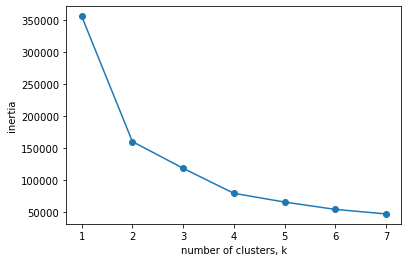

In [21]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_ucz)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

C:\Users\sebma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


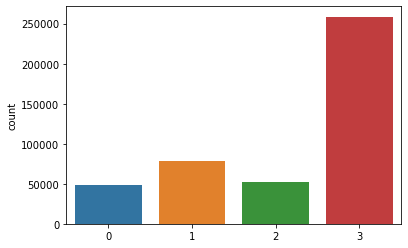

In [26]:
# KMeans
np.random.seed(100)
#algorithms = ['WARD', 'AVERAGE']

## Inicjalizacja random
#model_random = KMeans(n_clusters=4, init='random', n_init=1, max_iter=1)
#model_random.fit(X_ucz)

#y_cluster_random = model_random.predict(X_ucz)

## Inicjalizacja k-means++
#model_plusplus = KMeans(n_clusters=4, init='k-means++', n_init=1, max_iter=1)
#model_plusplus.fit(X_ucz)
#y_cluster_plusplus = model_plusplus.predict(X_ucz)

x = X_ucz[['zakup','rozmiar','kolor']].values
model = KMeans(n_clusters = 4, init = "random", max_iter = 300, n_init = 10)
y_clusters = model.fit_predict(x)

sns.countplot(y_clusters)


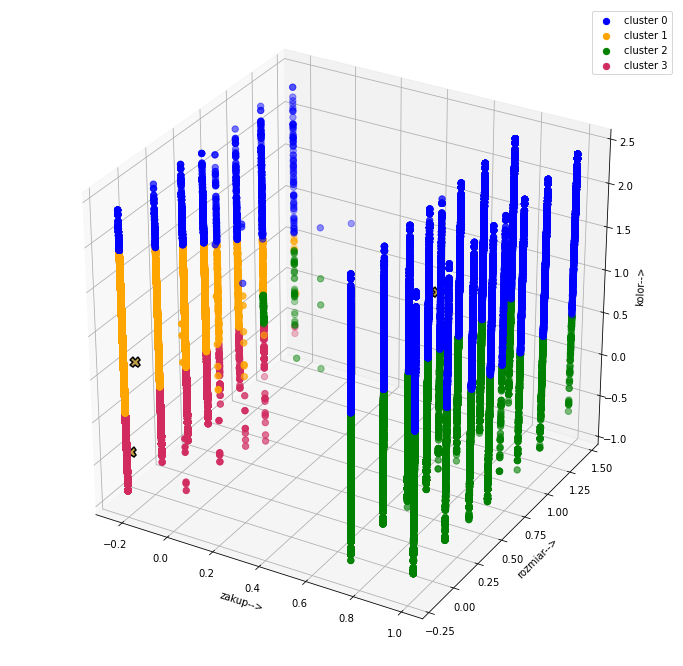

In [34]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.plot(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
        model.cluster_centers_[:, 2], 'X',color="#bf9f47",
        markersize=10,markeredgewidth=1.5, markeredgecolor="black")
ax.set_xlabel('zakup-->')
ax.set_ylabel('rozmiar-->')
ax.set_zlabel('kolor-->')
ax.legend()
plt.show()

In [103]:
df2

Child  SaleStatus  RegisterFlag     kolor   rozmiar  \
0            0           1             0  1.292445 -0.191975   
1            0           1             1 -0.537062 -0.191975   
2            0           1             0  0.221665 -0.191975   
3            0           1             0 -0.500102 -0.191975   
4            0           1             1  0.884607 -0.191975   
...        ...         ...           ...       ...       ...   
1455988      1           1             1  1.608749  0.886897   
1455989      0           1             0 -0.537062 -0.191975   
1455990      0           1             0 -0.500102 -0.191975   
1455991      0           0             0 -0.358743 -0.191975   
1455992      0           0             0  0.139449 -0.191975   

         kategoria_cenowa  fashion_level  czas_na_stronie  departament  \
0                0.470238       0.631732         0.758377    -0.240815   
1               -0.743734       0.313306        -0.886469    -0.355862   
2               -0.047308      -0.031644        -0.335168    -0.355862   
3                0.270942       0.336712         0.207076     1.038601   
4                0.470238      -0.008239        -0.335168    -0.355862   
...                   ...            ...              ...          ...   
1455988          0.470238       0.804865         0.306057     0.311874   
1455989          0.449821      -0.671615        -0.886469    -0.355862   
1455990         -0.743734      -0.153532        -0.886469    -0.355862   
1455991         -0.743734      -0.008239         0.355429    -0.355862   
1455992         -0.226188      -0.008239        -0.245244     0.311874   

            sezon  zainteresowanie_produktem  zainteresowanie_produktem_sum  \
0        0.075309                  -0.109265                      -0.043614   
1       -0.663161                  -0.570169                      -0.043927   
2        0.075309                   0.893876                      -0.043844   
3       -0.663161                  -0.694243                      -0.043936   
4        0.075309                   0.893876                      -0.043694   
...           ...                        ...                            ...   
1455988  0.075309                   0.893876                      -0.043024   
1455989 -0.663161                  -0.694243                      -0.043936   
1455990 -0.663161                  -0.570169                      -0.043922   
1455991  0.749595                  -0.570169                      -0.043909   
1455992  0.749595                  -0.233339                      -0.043882   

         zainteresowanie_produktem_mean     zakup  AvgTimeOnPage_sum  \
0                             -0.043459 -0.227519                223   
1                             -0.043963 -0.227519                  3   
2                             -0.044214 -0.227519                 60   
3                             -0.044466 -0.227519                 31   
4                             -0.043711 -0.227519                114   
...                                 ...       ...                ...   
1455988                       -0.043963  0.738072               1100   
1455989                       -0.044466 -0.227519                  0   
1455990                       -0.043711 -0.227519                  1   
1455991                       -0.043963 -0.227519                 17   
1455992                       -0.043963 -0.227519                219   

         AvgTimeOnPage_mean  
0                        15  
1                         3  
2                         8  
3                        31  
4                        11  
...                     ...  
1455988                  22  
1455989                   0  
1455990                   1  
1455991                   8  
1455992                  54  

[1455993 rows x 16 columns]

## Zainteresowanie produktem, czas suma, zakup

In [104]:
df_zainteresowanie_czas_zakup = df2[['zainteresowanie_produktem','AvgTimeOnPage_sum','zakup']]
df_zainteresowanie_czas_zakup

zainteresowanie_produktem  AvgTimeOnPage_sum     zakup
0                        -0.109265                223 -0.227519
1                        -0.570169                  3 -0.227519
2                         0.893876                 60 -0.227519
3                        -0.694243                 31 -0.227519
4                         0.893876                114 -0.227519
...                            ...                ...       ...
1455988                   0.893876               1100  0.738072
1455989                  -0.694243                  0 -0.227519
1455990                  -0.570169                  1 -0.227519
1455991                  -0.570169                 17 -0.227519
1455992                  -0.233339                219 -0.227519

[1455993 rows x 3 columns]

In [105]:
X_ucz, X_test = sklearn.model_selection.train_test_split(df_zainteresowanie_czas_zakup, test_size=0.7, random_state=12345)

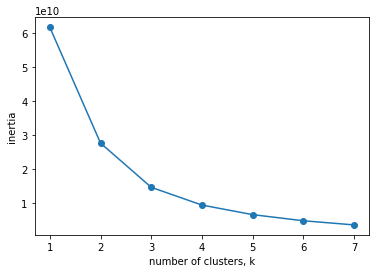

In [106]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_ucz)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

C:\Users\sebma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


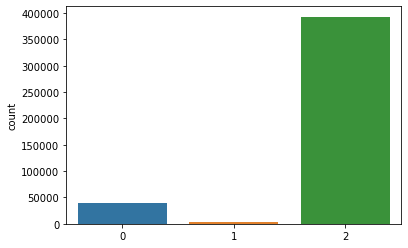

In [110]:
# KMeans
np.random.seed(100)


x = X_ucz[['AvgTimeOnPage_sum','zainteresowanie_produktem','zakup']].values
model = KMeans(n_clusters = 3, init = "random", max_iter = 300, n_init = 10)
y_clusters = model.fit_predict(x)

sns.countplot(y_clusters)


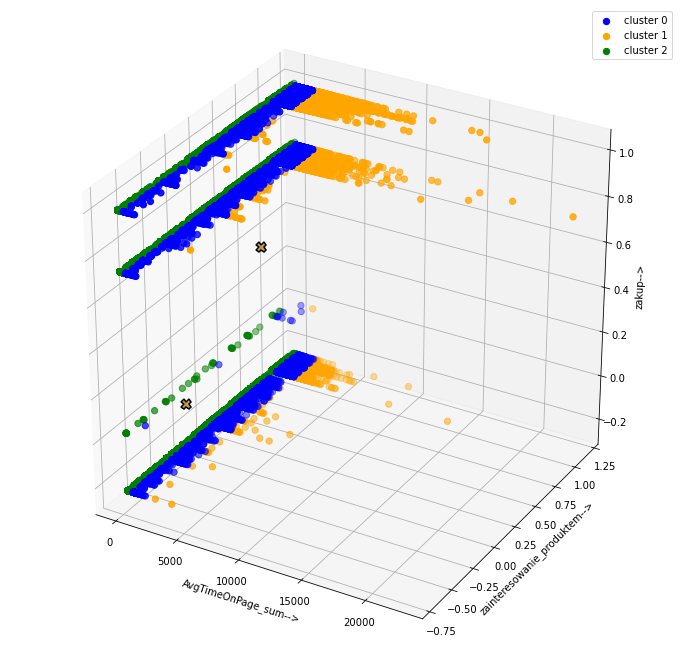

In [111]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.plot(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
        model.cluster_centers_[:, 2], 'X',color="#bf9f47",
        markersize=10,markeredgewidth=1.5, markeredgecolor="black")
ax.set_xlabel('AvgTimeOnPage_sum-->')
ax.set_ylabel('zainteresowanie_produktem-->')
ax.set_zlabel('zakup-->')
ax.legend()
plt.show()

## Czas, zakup

In [150]:
df_zakup_time = df2[['zakup','czas_na_stronie']]
df_zakup_time

zakup  czas_na_stronie
0       -0.227519         0.758377
1       -0.227519        -0.886469
2       -0.227519        -0.335168
3       -0.227519         0.207076
4       -0.227519        -0.335168
...           ...              ...
1455988  0.738072         0.306057
1455989 -0.227519        -0.886469
1455990 -0.227519        -0.886469
1455991 -0.227519         0.355429
1455992 -0.227519        -0.245244

[1455993 rows x 2 columns]

In [151]:
X_ucz, X_test = sklearn.model_selection.train_test_split(df_zakup_time, test_size=0.7, random_state=12345)

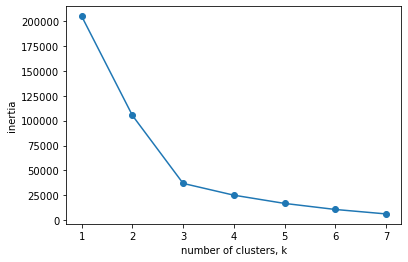

In [152]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_ucz)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

C:\Users\sebma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


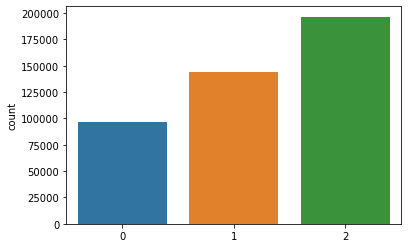

In [153]:
#KMeans
np.random.seed(100)

x = X_ucz[['czas_na_stronie','zakup']].values


model = KMeans(n_clusters = 3, init = "random", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

sns.countplot(y_clusters)



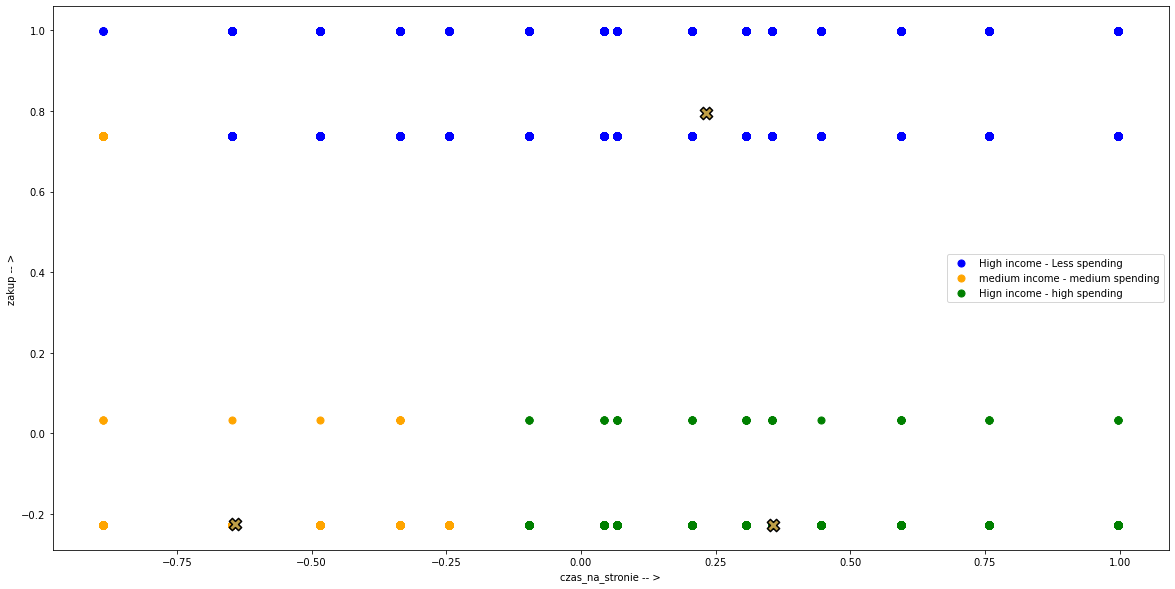

In [154]:
plt.figure(figsize = (20,10))
plt.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],s = 50, c = 'blue')
plt.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],s = 50, c = 'orange')
plt.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],s = 50, c = 'green')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker='X',color="#bf9f47", s=150,linewidths=1.5, edgecolors="black")
plt.xlabel("czas_na_stronie -- >")
plt.ylabel("zakup -- >")
plt.legend()
plt.show()

## kolory i dzieci

In [181]:
df_Kolor_Dziecko = df2[['Child','kolor']]
df_Kolor_Dziecko

Child     kolor
0            0  1.292445
1            0 -0.537062
2            0  0.221665
3            0 -0.500102
4            0  0.884607
...        ...       ...
1455988      1  1.608749
1455989      0 -0.537062
1455990      0 -0.500102
1455991      0 -0.358743
1455992      0  0.139449

[1455993 rows x 2 columns]

In [182]:
X_ucz, X_test = sklearn.model_selection.train_test_split(df_Kolor_Dziecko, test_size=0.7, random_state=12345)

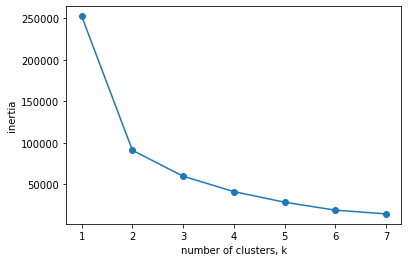

In [183]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_ucz)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

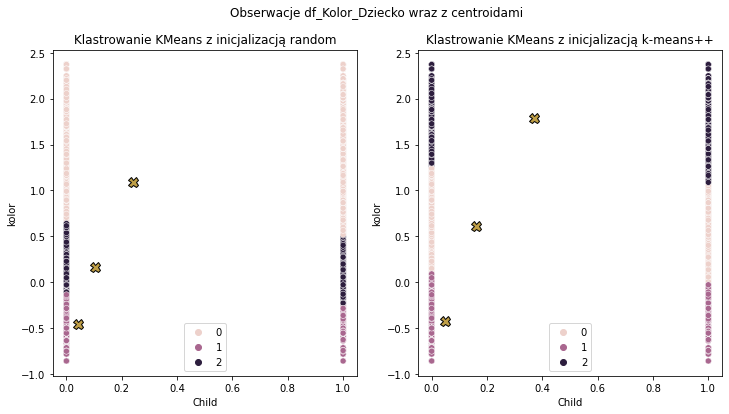

In [185]:
# KMeans
np.random.seed(100)


## Inicjalizacja random
model_random = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1)
model_random.fit(X_ucz)

y_cluster_random = model_random.predict(X_ucz)

## Inicjalizacja k-means++
model_plusplus = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=1)
model_plusplus.fit(X_ucz)

y_cluster_plusplus = model_plusplus.predict(X_ucz)

# # Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(x=X_ucz['Child'], y=X_ucz['kolor'], hue=y_cluster_random, ax=ax[0])
sns.scatterplot(x=X_ucz['Child'], y=X_ucz['kolor'], hue=y_cluster_plusplus, ax=ax[1])
ax[0].plot(model_random.cluster_centers_[:, 0], model_random.cluster_centers_[:, 1], 'X',color="#bf9f47",markersize=10,linewidth=1.5,mec="black")
ax[0].set_title('Klastrowanie KMeans z inicjalizacją random')
ax[1].plot(model_plusplus.cluster_centers_[:, 0], model_plusplus.cluster_centers_[:, 1], 'X',color="#bf9f47",markersize=10,linewidth=1.5,mec="black")
ax[1].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje df_Kolor_Dziecko wraz z centroidami')
plt.xlabel('Child')
plt.ylabel('kolor')
plt.show()



C:\Users\sebma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


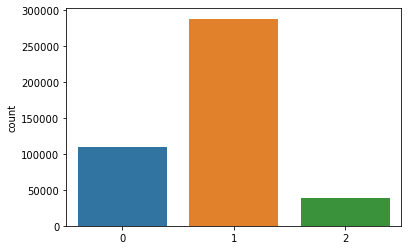

In [187]:
sns.countplot(y_cluster_random)
sns.countplot(y_cluster_plusplus)


In [ ]:
kolor_PCA['ile_kolorow']=kolor_PCA['kolory'].apply(lambda x: x.count(",") + 1)

In [ ]:
kolor_PCA=kolor_PCA.sort_values(by=['kolor'])
kolor_PCA

In [ ]:
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(kolor_PCA['kolor'], kolor_PCA['ile_kolorow'])


In [172]:
df[['DepartmentName_accessories','DepartmentName_kids','DepartmentName_ladies','DepartmentName_men']]


DepartmentName_accessories  DepartmentName_kids  \
0                                 1                    0   
1                                 0                    0   
2                                 0                    0   
3                                 0                    1   
4                                 0                    0   
...                             ...                  ...   
1455988                           0                    1   
1455989                           0                    0   
1455990                           0                    0   
1455991                           0                    0   
1455992                           0                    1   

         DepartmentName_ladies  DepartmentName_men  
0                            1                   0  
1                            1                   0  
2                            1                   0  
3                            0                   0  
4                            1                   0  
...                        ...                 ...  
1455988                      1                   0  
1455989                      1                   0  
1455990                      1                   0  
1455991                      1                   0  
1455992                      1                   0  

[1455993 rows x 4 columns]

## Ladies i kolorki

In [188]:
df_Ladies_Kolor = pd.concat([df[['DepartmentName_ladies']],df2[['kolor']]],axis=1)
X_ucz, X_test = sklearn.model_selection.train_test_split(df_Ladies_Kolor, test_size=0.7, random_state=12345)

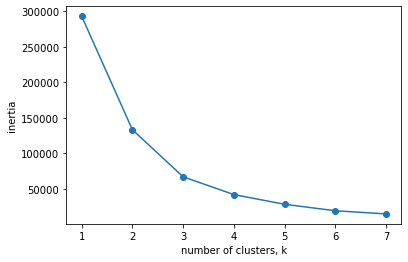

In [189]:
ks = range(1, 8)
inertias = []

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(X_ucz)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

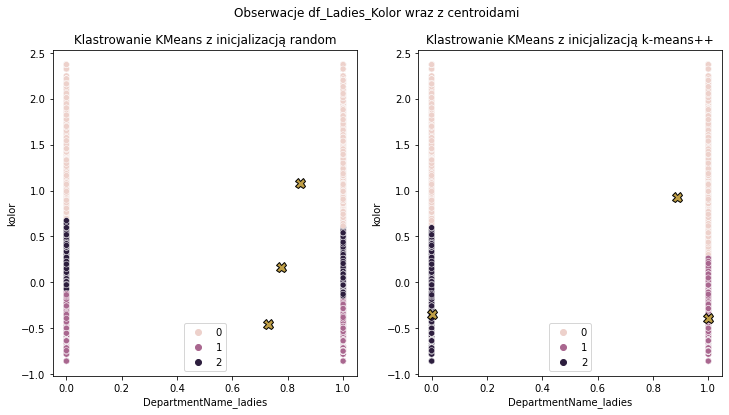

In [190]:
# KMeans
np.random.seed(100)


## Inicjalizacja random
model_random = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1)
model_random.fit(X_ucz)

y_cluster_random = model_random.predict(X_ucz)

## Inicjalizacja k-means++
model_plusplus = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=1)
model_plusplus.fit(X_ucz)

y_cluster_plusplus = model_plusplus.predict(X_ucz)

# # Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(x=X_ucz['DepartmentName_ladies'], y=X_ucz['kolor'], hue=y_cluster_random, ax=ax[0])
sns.scatterplot(x=X_ucz['DepartmentName_ladies'], y=X_ucz['kolor'], hue=y_cluster_plusplus, ax=ax[1])
ax[0].plot(model_random.cluster_centers_[:, 0], model_random.cluster_centers_[:, 1], 'X',color="#bf9f47",markersize=10,linewidth=1.5,mec="black")
ax[0].set_title('Klastrowanie KMeans z inicjalizacją random')
ax[1].plot(model_plusplus.cluster_centers_[:, 0], model_plusplus.cluster_centers_[:, 1], 'X',color="#bf9f47",markersize=10,linewidth=1.5,mec="black")
ax[1].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje df_Ladies_Kolor wraz z centroidami')
plt.xlabel('DepartmentName_ladies')
plt.ylabel('kolor')
plt.show()


C:\Users\sebma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


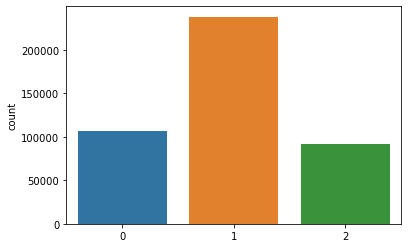

In [192]:
#sns.countplot(y_cluster_random)
sns.countplot(y_cluster_plusplus)

## czas na stronie i zakup

In [238]:
df_czas_zakup = df2[['czas_na_stronie','zakup']]

In [239]:
X_ucz, X_test = sklearn.model_selection.train_test_split(df_czas_zakup, test_size=0.7, random_state=12345)

In [217]:
ks = range(1, 8)
inertias = []

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(X_ucz)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

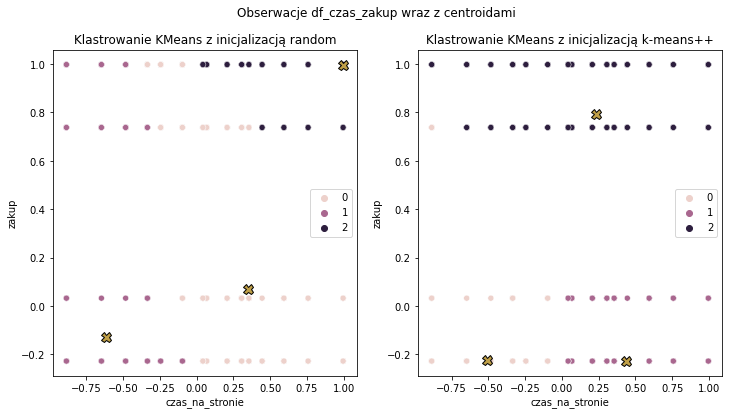

In [241]:
# KMeans
np.random.seed(100)

## Inicjalizacja random
model_random = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1)
model_random.fit(X_ucz)

y_cluster_random = model_random.predict(X_ucz)

## Inicjalizacja k-means++
model_plusplus = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=1)
model_plusplus.fit(X_ucz)

y_cluster_plusplus = model_plusplus.predict(X_ucz)

# # Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(x=X_ucz['czas_na_stronie'], y=X_ucz['zakup'], hue=y_cluster_random, ax=ax[0])
sns.scatterplot(x=X_ucz['czas_na_stronie'], y=X_ucz['zakup'], hue=y_cluster_plusplus, ax=ax[1])
ax[0].plot(model_random.cluster_centers_[:, 0], model_random.cluster_centers_[:, 1], 'X',color="#bf9f47",markersize=10,linewidth=1.5,mec="black")
ax[0].set_title('Klastrowanie KMeans z inicjalizacją random')
ax[1].plot(model_plusplus.cluster_centers_[:, 0], model_plusplus.cluster_centers_[:, 1], 'X',color="#bf9f47",markersize=10,linewidth=1.5,mec="black")
ax[1].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje df_czas_zakup wraz z centroidami')
plt.xlabel('czas_na_stronie')
plt.ylabel('zakup')
plt.show()


In [243]:
#sns.countplot(y_cluster_random)
sns.countplot(y_cluster_plusplus)

C:\Users\sebma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
zakup_PCA['ile_zakupow']=zakup_PCA['zakupy'].apply(lambda x: x.count(",") + 1)
zakup_PCA['ile_zakupow'][zakup_PCA.zakupy == ''] = 0
zakup_PCA=zakup_PCA.sort_values(by=['zakup'])

plt.figure(figsize=(7,7), dpi=80)
plt.plot(zakup_PCA['zakup'], zakup_PCA['ile_zakupow'])

# zainteresowanie produktem i kolor


In [244]:
df_zainteresowanie_produktem_kolor = df2[['zainteresowanie_produktem','kolor']]

In [245]:
X_ucz, X_test = sklearn.model_selection.train_test_split(df_zainteresowanie_produktem_kolor, test_size=0.7, random_state=12345)

In [223]:
ks = range(1, 8)
inertias = []

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(X_ucz)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

C:\Users\sebma\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


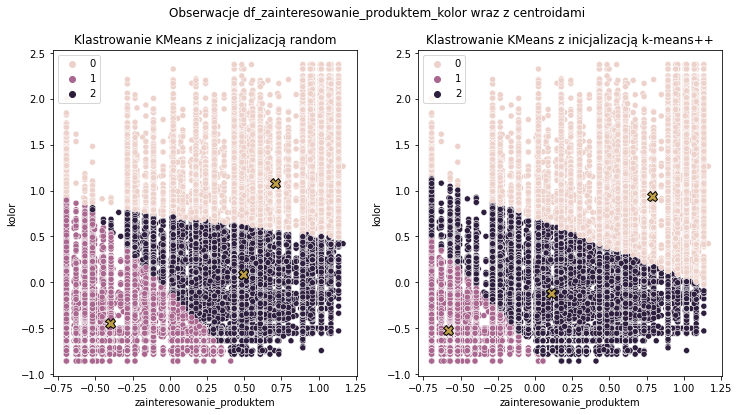

In [246]:
# KMeans
np.random.seed(100)

## Inicjalizacja random
model_random = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1)
model_random.fit(X_ucz)

y_cluster_random = model_random.predict(X_ucz)

## Inicjalizacja k-means++
model_plusplus = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=1)
model_plusplus.fit(X_ucz)

y_cluster_plusplus = model_plusplus.predict(X_ucz)

# # Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(x=X_ucz['zainteresowanie_produktem'], y=X_ucz['kolor'], hue=y_cluster_random, ax=ax[0])
sns.scatterplot(x=X_ucz['zainteresowanie_produktem'], y=X_ucz['kolor'], hue=y_cluster_plusplus, ax=ax[1])
ax[0].plot(model_random.cluster_centers_[:, 0], model_random.cluster_centers_[:, 1], 'X',color="#bf9f47",markersize=10,linewidth=1.5,mec="black")
ax[0].set_title('Klastrowanie KMeans z inicjalizacją random')
ax[1].plot(model_plusplus.cluster_centers_[:, 0], model_plusplus.cluster_centers_[:, 1], 'X',color="#bf9f47",markersize=10,linewidth=1.5,mec="black")
ax[1].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje df_zainteresowanie_produktem_kolor wraz z centroidami')
plt.xlabel('zainteresowanie_produktem')
plt.ylabel('kolor')
plt.show()


In [248]:
#sns.countplot(y_cluster_random)
sns.countplot(y_cluster_plusplus)

C:\Users\sebma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
plt.figure(figsize=(7,7), dpi=80)
plt.plot(kolor_PCA['kolor'], kolor_PCA['ile_kolorow'])

# kategoria cenowa i zakup

In [249]:
df_cena_zakup = df2[['kategoria_cenowa','zakup']]

In [250]:
X_ucz, X_test = sklearn.model_selection.train_test_split(df_cena_zakup, test_size=0.7, random_state=12345)

In [231]:
ks = range(1, 8)
inertias = []

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(X_ucz)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [251]:
np.random.seed(100)

## Inicjalizacja random
model_random = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1)
model_random.fit(X_ucz)

y_cluster_random = model_random.predict(X_ucz)

## Inicjalizacja k-means++
model_plusplus = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=1)
model_plusplus.fit(X_ucz)

y_cluster_plusplus = model_plusplus.predict(X_ucz)

# # Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(x=X_ucz['kategoria_cenowa'], y=X_ucz['zakup'], hue=y_cluster_random, ax=ax[0])
sns.scatterplot(x=X_ucz['kategoria_cenowa'], y=X_ucz['zakup'], hue=y_cluster_plusplus, ax=ax[1])
ax[0].plot(model_random.cluster_centers_[:, 0], model_random.cluster_centers_[:, 1], 'X',color="#bf9f47",markersize=10,linewidth=1.5,mec="black")
ax[0].set_title('Klastrowanie KMeans z inicjalizacją random')
ax[1].plot(model_plusplus.cluster_centers_[:, 0], model_plusplus.cluster_centers_[:, 1], 'X',color="#bf9f47",markersize=10,linewidth=1.5,mec="black")
ax[1].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje df_cena_zakup wraz z centroidami')
plt.xlabel('kategoria_cenowa')
plt.ylabel('zakup')
plt.show()

In [253]:
#sns.countplot(y_cluster_random)
sns.countplot(y_cluster_plusplus)

C:\Users\sebma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# zainteresowanie produktem i fashion level

In [26]:
df_child_fashion = df2[['Child','fashion_level']]
X_ucz, X_test = sklearn.model_selection.train_test_split(df_zainteresowanie_fashion, test_size=0.7, random_state=12345)

In [27]:
ks = range(1, 8)
inertias = []

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(X_ucz)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [36]:
np.random.seed(100)

## Inicjalizacja random
model_random = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1)
model_random.fit(X_ucz)

y_cluster_random = model_random.predict(X_ucz)

## Inicjalizacja k-means++
model_plusplus = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=1)
model_plusplus.fit(X_ucz)

y_cluster_plusplus = model_plusplus.predict(X_ucz)

# # Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(x=X_ucz['Child'], y=X_ucz['fashion_level'],palette=['#F0D8B8','#634F40','#94553D'],hue=y_cluster_plusplus, ax=ax[0],s=2)
sns.scatterplot(x=X_ucz['Child'], y=X_ucz['fashion_level'],palette=['#F0D8B8','#634F40','#94553D'],hue=y_cluster_plusplus, ax=ax[1])
ax[0].plot(model_random.cluster_centers_[:, 0], model_random.cluster_centers_[:, 1], 'X',color="#bf9f47",markersize=10,linewidth=1.5,mec="black")
ax[0].set_title('Klastrowanie KMeans z inicjalizacją random')
ax[1].plot(model_plusplus.cluster_centers_[:, 0], model_plusplus.cluster_centers_[:, 1], 'X',color="#bf9f47",markersize=10,linewidth=1.5,mec="black")
ax[1].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje df_child_fashion wraz z centroidami')
plt.xlabel('Child')
plt.ylabel('fashion_level')
plt.show()



In [ ]:
y_cluster_random

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

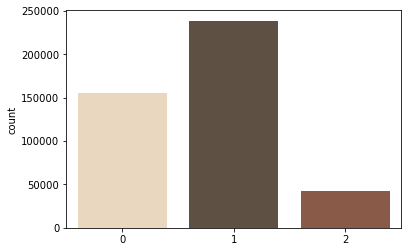

In [33]:
sns.countplot(y_cluster_random,palette=['#F0D8B8','#634F40','#94553D'])
#sns.countplot(y_cluster_plusplus,palette=['#F0D8B8','#634F40','#94553D'])

In [ ]:
zainteresowanie_PCA=zainteresowanie_PCA.sort_values(by=['zainteresowanie_produktem'])
zainteresowanie_PCA

In [ ]:
zainteresowanie_PCA['aktywnosc']=zainteresowanie_PCA['zainteresowania'].apply(lambda x: x.count(",") + 1)

In [ ]:
plt.figure(figsize=(6, 6), dpi=80)
plt.plot(zainteresowanie_PCA['zainteresowanie_produktem'], zainteresowanie_PCA['aktywnosc'])

In [ ]:
fashion_level_PCA=fashion_level_PCA.sort_values(by=['fashion_level'])
fashion_level_PCA['zroznicowanie']=fashion_level_PCA['fashion_levele'].apply(lambda x: x.count(",") + 1)

In [ ]:
plt.figure(figsize=(6, 6), dpi=80)
plt.plot(fashion_level_PCA['fashion_level'], fashion_level_PCA['zroznicowanie'])

# kategoria cenowa i zakup 2 (z odwortnym PCA)

In [ ]:
kategoria_cenowa_PCA['wartosc']=kategoria_cenowa_PCA['kategorie_cenowe'].map({'': 0, 'LIP': 1, 'MIP':2, 'HIP':3, 'LIP,MIP':1.5, 'MIP,HIP':2.5, 'LIP,MIP,HIP':2, 'LIP,HIP':2})
kategoria_cenowa_PCA


In [ ]:
kategoria_cenowa_PCA

In [ ]:
df3=df2.copy()
#df3

In [ ]:
df3['wartosc']=df3['kategoria_cenowa'].map({-0.246604: 0, 0.449821: 1, -0.743734:2, 0.270942:3, -0.047308:1.5, -0.226188:2.5, 0.470238:2, 0.967367:2})
df3

In [ ]:
df_cena_zakup2 =pd.concat([df3['wartosc'], df3['zakup']], axis=1)
df_cena_zakup2

In [ ]:
X_ucz, X_test = sklearn.model_selection.train_test_split(df_cena_zakup2, test_size=0.5, random_state=12345)
print(X_ucz.shape)
print(X_test.shape)

In [ ]:
# KMeans
np.random.seed(100)
algorithms = ['WARD', 'AVERAGE']

## Inicjalizacja random
model_random = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1)
model_random.fit(X_ucz)

y_cluster_random = model_random.predict(X_ucz)

## Inicjalizacja k-means++
model_plusplus = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=1)
model_plusplus.fit(X_ucz)

y_cluster_plusplus = model_plusplus.predict(X_ucz)

# # Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(x=X_ucz['wartosc'], y=X_ucz['zakup'], hue=y_cluster_random, ax=ax[0])
sns.scatterplot(x=X_ucz['wartosc'], y=X_ucz['zakup'], hue=y_cluster_plusplus, ax=ax[1])
ax[0].plot(model_random.cluster_centers_[:, 0], model_random.cluster_centers_[:, 1], 'ro')
ax[0].set_title('Klastrowanie KMeans z inicjalizacją random')
ax[1].plot(model_plusplus.cluster_centers_[:, 0], model_plusplus.cluster_centers_[:, 1], 'ro')
ax[1].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje df_cena_zakup wraz z centroidami')
plt.xlabel('wartosc')
plt.ylabel('zakup')
plt.show()



## Zainteresowanie produktem, fashion level

In [18]:
df_zainteresowanie_fashion = df2[['zainteresowanie_produktem','fashion_level']]
X_ucz, X_test = sklearn.model_selection.train_test_split(df_zainteresowanie_fashion, test_size=0.7, random_state=12345)

In [22]:
ks = range(1, 8)
inertias = []

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(X_ucz)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
np.random.seed(100)

## Inicjalizacja random
model_random = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1)
model_random.fit(X_ucz)

y_cluster_random = model_random.predict(X_ucz)

## Inicjalizacja k-means++
model_plusplus = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=1)
model_plusplus.fit(X_ucz)

y_cluster_plusplus = model_plusplus.predict(X_ucz)

# # Wizualizacja
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.scatterplot(x=X_ucz['zainteresowanie_produktem'], y=X_ucz['fashion_level'], hue=y_cluster_random, ax=ax[0])
sns.scatterplot(x=X_ucz['zainteresowanie_produktem'], y=X_ucz['fashion_level'], hue=y_cluster_plusplus, ax=ax[1])
ax[0].plot(model_random.cluster_centers_[:, 0], model_random.cluster_centers_[:, 1], 'X',color="#bf9f47",markersize=10,linewidth=1.5,mec="black")
ax[0].set_title('Klastrowanie KMeans z inicjalizacją random')
ax[1].plot(model_plusplus.cluster_centers_[:, 0], model_plusplus.cluster_centers_[:, 1], 'X',color="#bf9f47",markersize=10,linewidth=1.5,mec="black")
ax[1].set_title('Klastrowanie KMeans z inicjalizacją k-means++')
plt.suptitle('Obserwacje df_zainteresowanie_fashion wraz z centroidami')
plt.xlabel('zainteresowanie_produktem')
plt.ylabel('fashion_level')
plt.show()
